### Ejercicios Clase 2

In [1]:
# Definición general de librerías de trabajo
from scipy.io.wavfile import read,write # libreria para lectura/escritura de archivos de audio
from IPython.display import Audio # libreria para la reproducción de audios cargados
import numpy as np # libreria básica operadores matemáticos y de arreglos
import matplotlib.pylab as plt # librería de graficación
%matplotlib inline 
import math # libreria de operadores matemáticos especiales
from scipy.io.wavfile import read,write # libreria para lectura/escritura de archivos de audio

#### 1. Grafique dos señales en donde se pueda observar el teorema de Nyquist en una señal y cuando no se cumpla. Teniendo en cuenta que el número de periodos debe ser 30 y fs=20 ¿Por qué es importante tener en cuenta el teorema de Nyquist? 

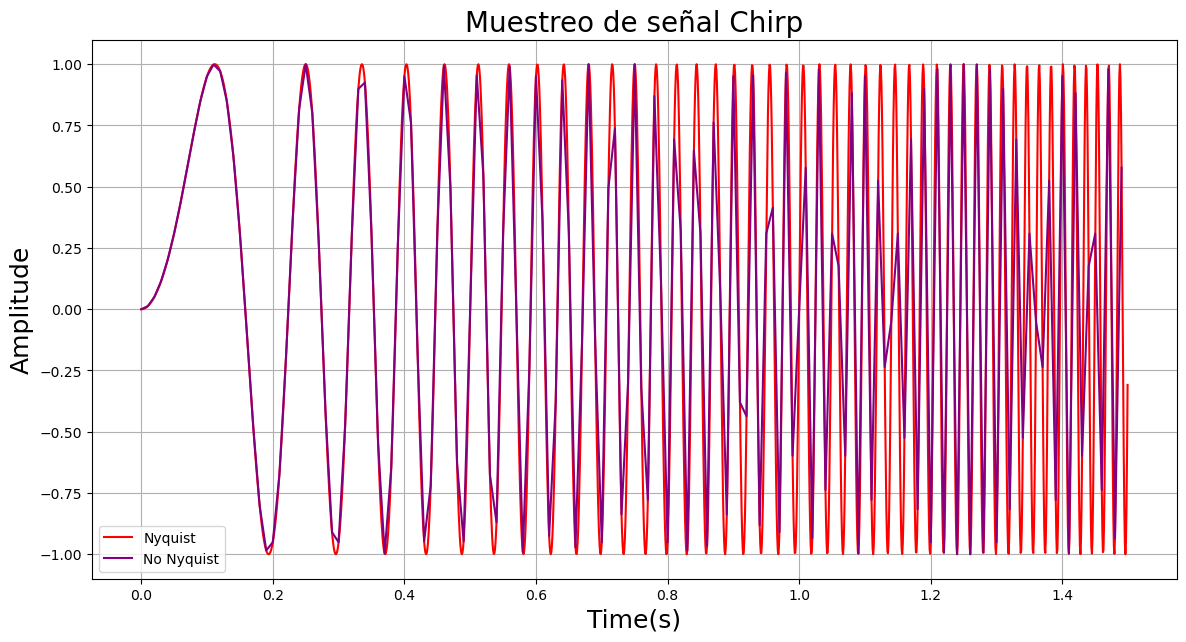

In [2]:
fs=20 # Frecuencia fundamental de la señal
periodos=30 #Numero de periodos a observar
t=np.arange(0,periodos/fs,0.2/fs)#ls frecuencia de muestreo queda fijada a 5 veces la frecuencia de la señal fundamental
f=2*np.pi*fs*t
signal=np.sin(f*t) # Señal de frecuencia variable muestreada a frecuencia constante 5 veces f1
t2=np.arange(0,periodos/fs,1/(2*periodos*fs))#ls frecuencia de muestreo queda fijada para cumplir nyquist en el intervalo de observación
f2=2*np.pi*fs*t2
signal2=np.sin(f2*t2) # Señal de frecuencia variable muestreada a frecuencia constante 5 veces f1
%matplotlib inline 
plt.figure(figsize=(14,7))# tamaño de la figura
plt.title('Muestreo de señal Chirp',fontsize=20)
plt.plot(t2,signal2, color='red',label='Nyquist') # Dibujar la grafica
plt.plot(t,signal, color='purple',label='No Nyquist') # Dibujar la grafica
plt.xlabel('Time(s)',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.grid()
plt.legend()
plt.show() # Mostrar la grafica

Se observa el deterioro progresivo de la señal debido al submuestreo y al no cumplimiento del teorema de Nyquist.

#### 2. Cargue el archivo de audio correspondiente, agréguele ruido blanco. Posteriormente grafique la señal y escuche el audio. ¿Qué puede decir del ruido blanco? ¿Qué causa este ruido en el audio? Compare el audio original con el audio con ruido.

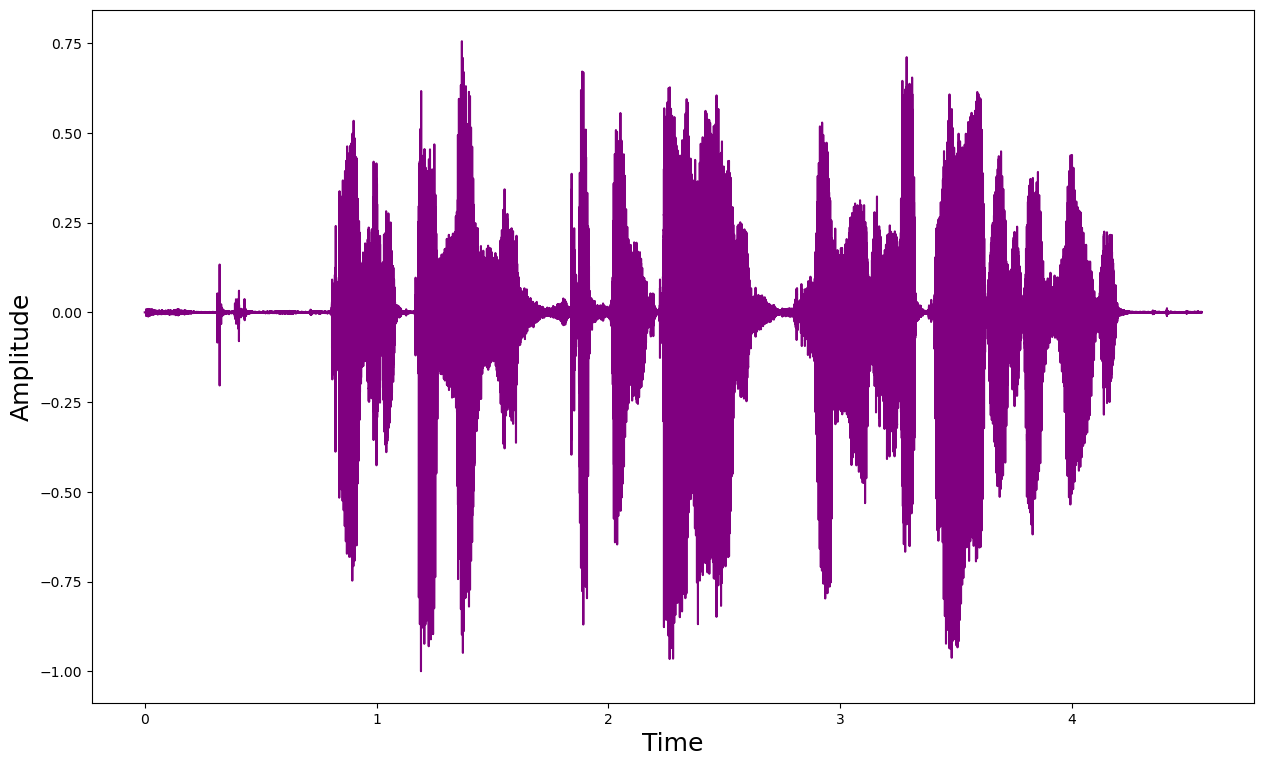

In [3]:
file_audio=('hola.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
x=x/float(max(abs(x))) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo
%matplotlib inline
plt.figure(figsize=(15,9))# tamaño de la figura
plt.plot(t,x, color='purple') # Dibujar la grafica
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica
noise = 0.1*np.random.randn(len(x))         # ruido blanco
signal_with_noise = x + noise  # Se añade el ruido a la señal

In [4]:
Audio(x, rate=fs) # para escuchar la senal a la frecuencia original

#### 3. Grafique las dos señales en una misma figura. ¿Qué se puede observar?

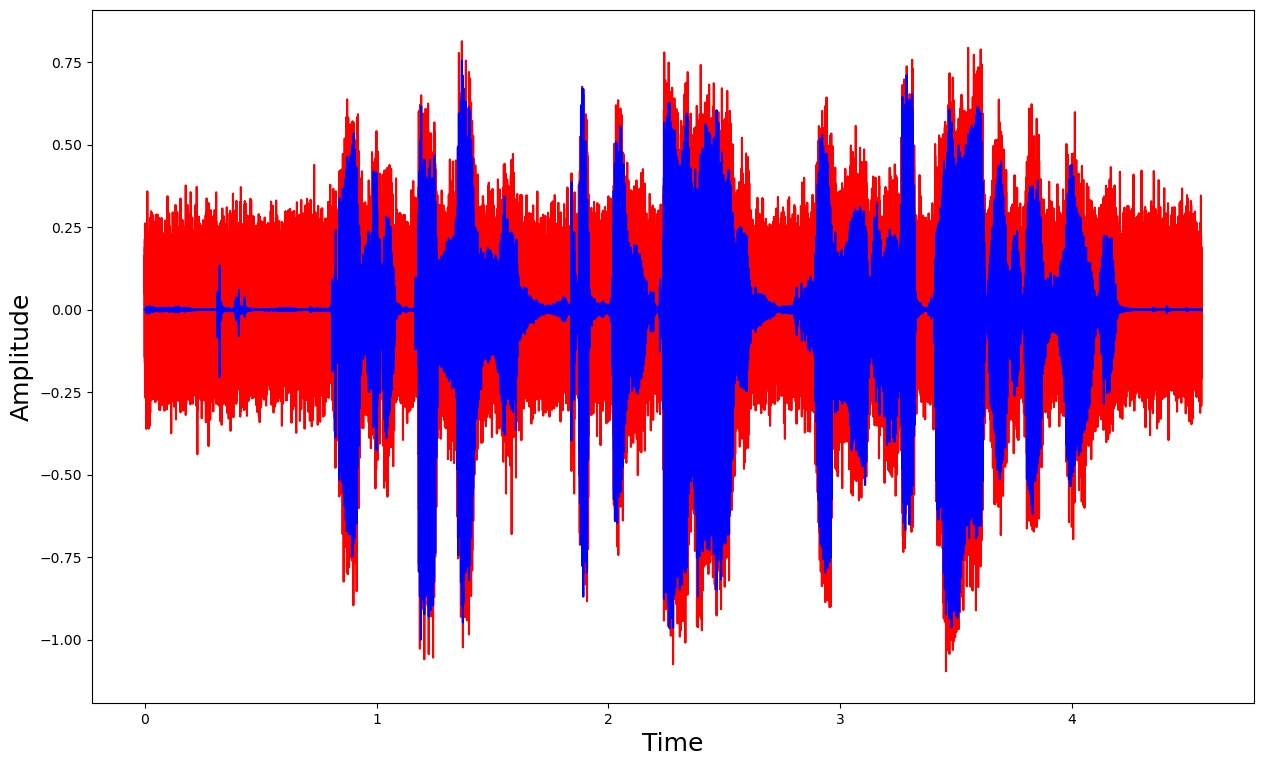

In [5]:
%matplotlib inline
plt.figure(figsize=(15,9))# tamaño de la figura
plt.plot(t,signal_with_noise, color='red') # Dibujar la grafica
plt.plot(t,x, color='blue') # Dibujar la grafica
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica

In [6]:
Audio(signal_with_noise, rate=fs) # para escuchar la senal a la frecuencia original